In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

import pickle

from DataExploration import *
from DataExploration import descriptive_statistics as ds
from DataExploration import plots as pl

## Guidelines

I nedenstående codeblock udfyld de givne variabler med det ønskede data, og kør det.

**Indsæt variabler nedenfor**


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
ds.describe_data(df, verbose=True, round_digits=2)

Summary: 1470 rows × 35 columns
                          count          mean          std     min     25%      50%      75%      max
feature                                                                                              
Age                        1470      36.92381     9.135373    18.0    30.0     36.0     43.0     60.0
Attrition                  1470           NaN          NaN     NaN     NaN      NaN      NaN      NaN
BusinessTravel             1470           NaN          NaN     NaN     NaN      NaN      NaN      NaN
DailyRate                  1470    802.485714     403.5091   102.0   465.0    802.0   1157.0   1499.0
Department                 1470           NaN          NaN     NaN     NaN      NaN      NaN      NaN
DistanceFromHome           1470      9.192517     8.106864     1.0     2.0      7.0     14.0     29.0
Education                  1470      2.912925     1.024165     1.0     2.0      3.0      4.0      5.0
EducationField             1470           NaN     

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
Age,1470,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [6]:
df.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'StandardHours'], axis=1, inplace=True)

/Users/franckdux/Documents/GitHub/4. Semester/BI/MP3/DataExploration/plots.py:71: RuntimeWarning: divide by zero encountered in scalar divide
  p = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
/Users/franckdux/Documents/GitHub/4. Semester/BI/MP3/DataExploration/plots.py:71: RuntimeWarning: divide by zero encountered in divide
  p = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
/Users/franckdux/Documents/GitHub/4. Semester/BI/MP3/DataExploration/plots.py:71: RuntimeWarning: invalid value encountered in multiply
  p = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)


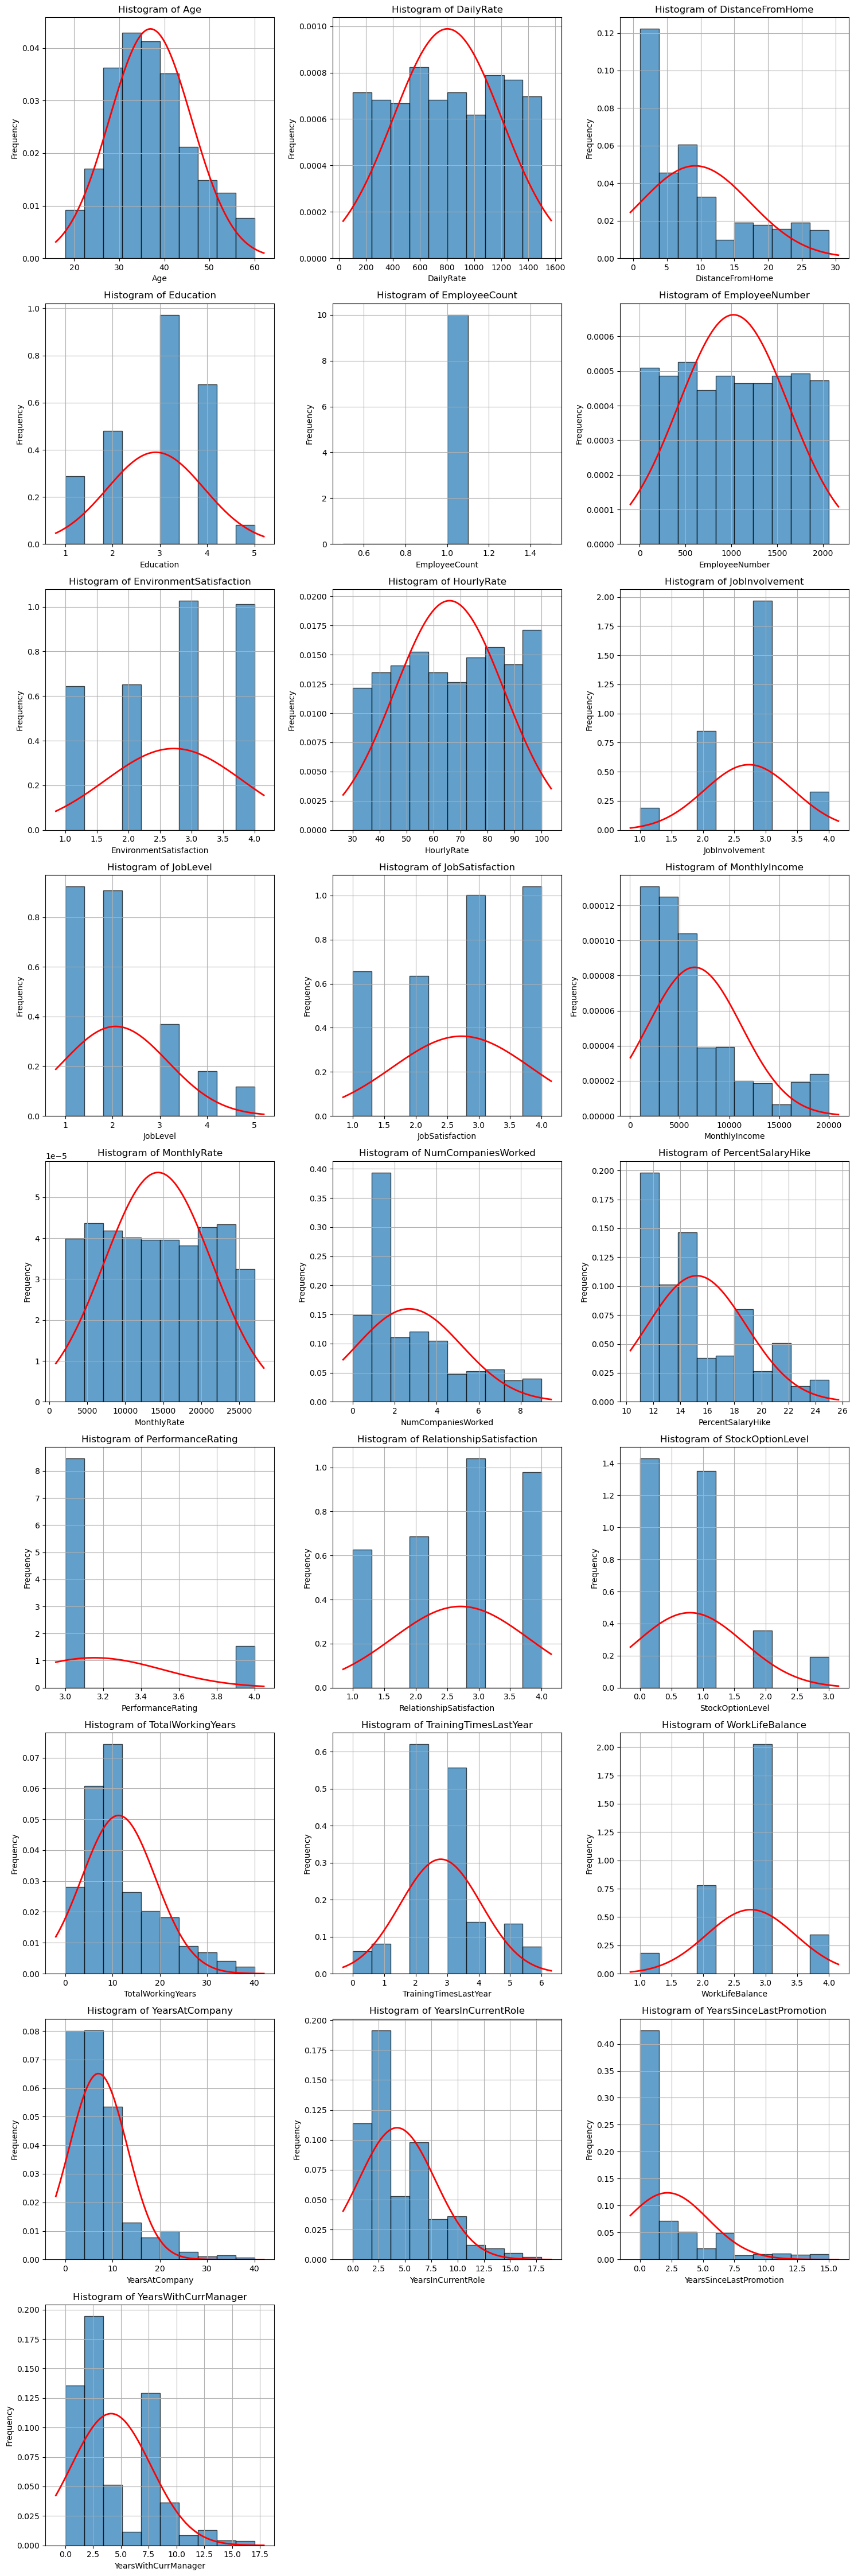

In [7]:
pl.show_histograms(df, layout='grid', bell_curve=True)

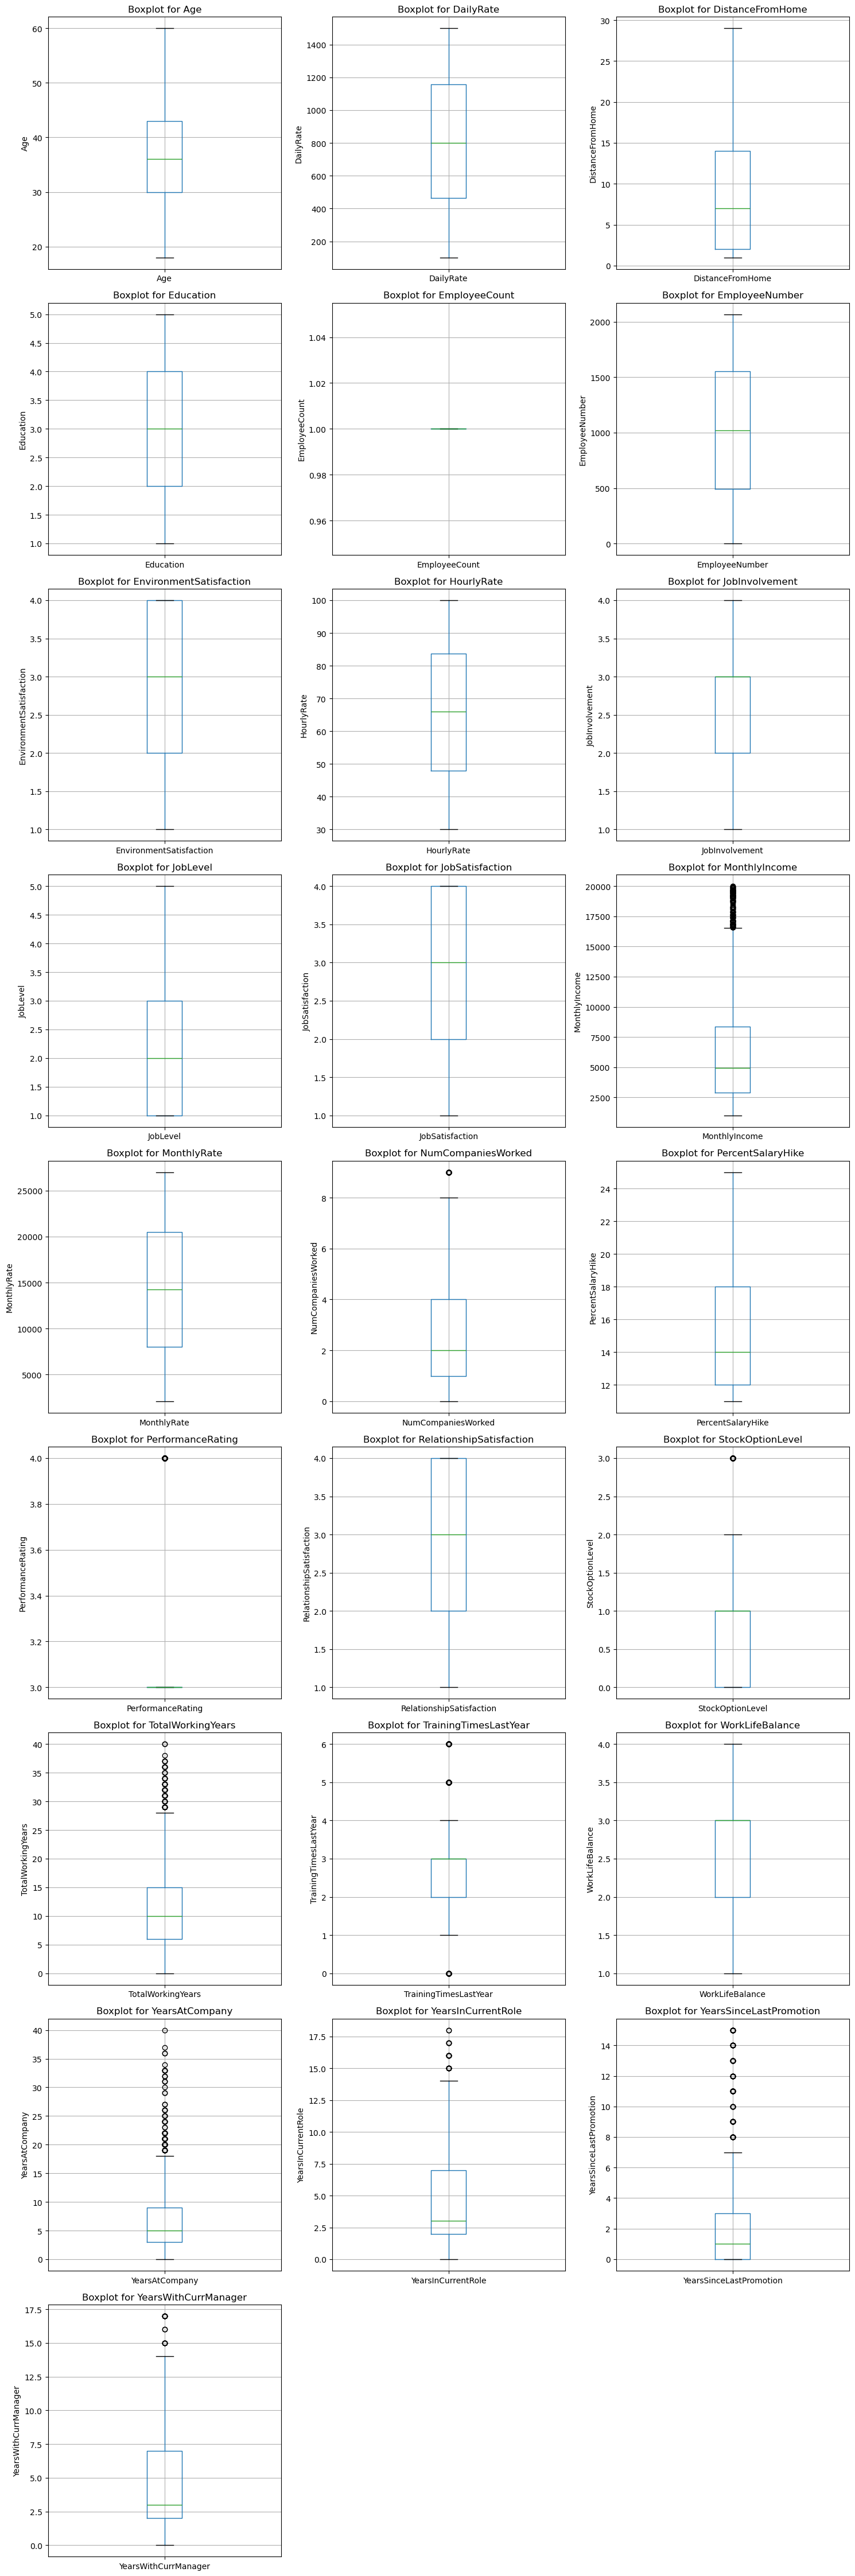

In [8]:
pl.show_boxplots(df, layout='grid')

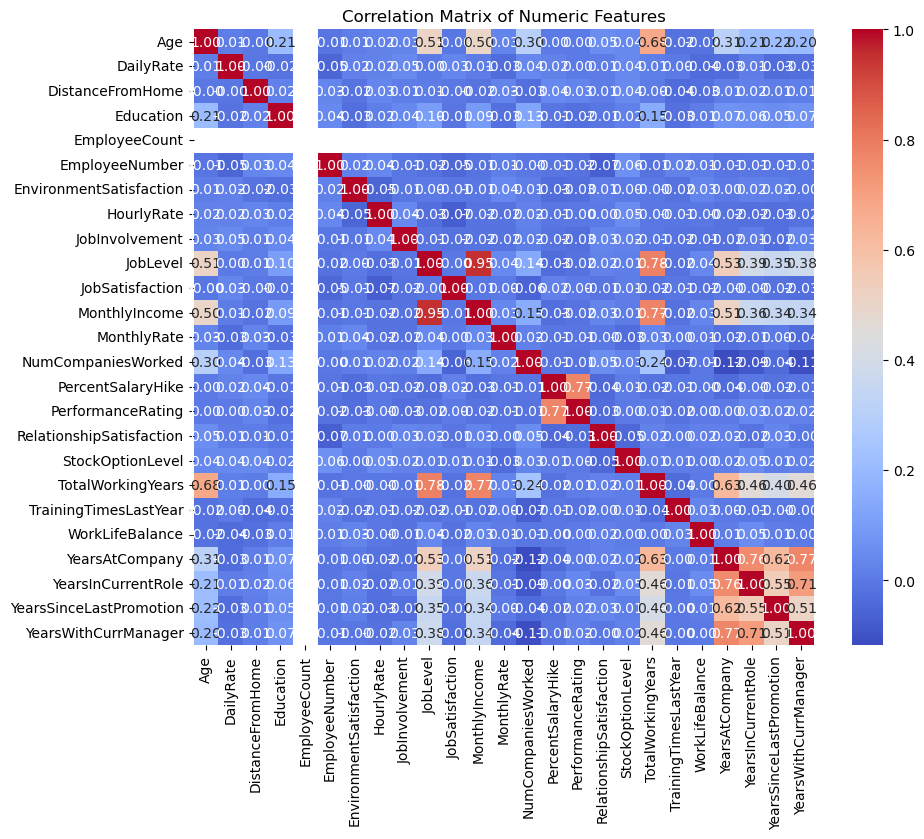

In [9]:
pl.show_correlation_heatmap(df)

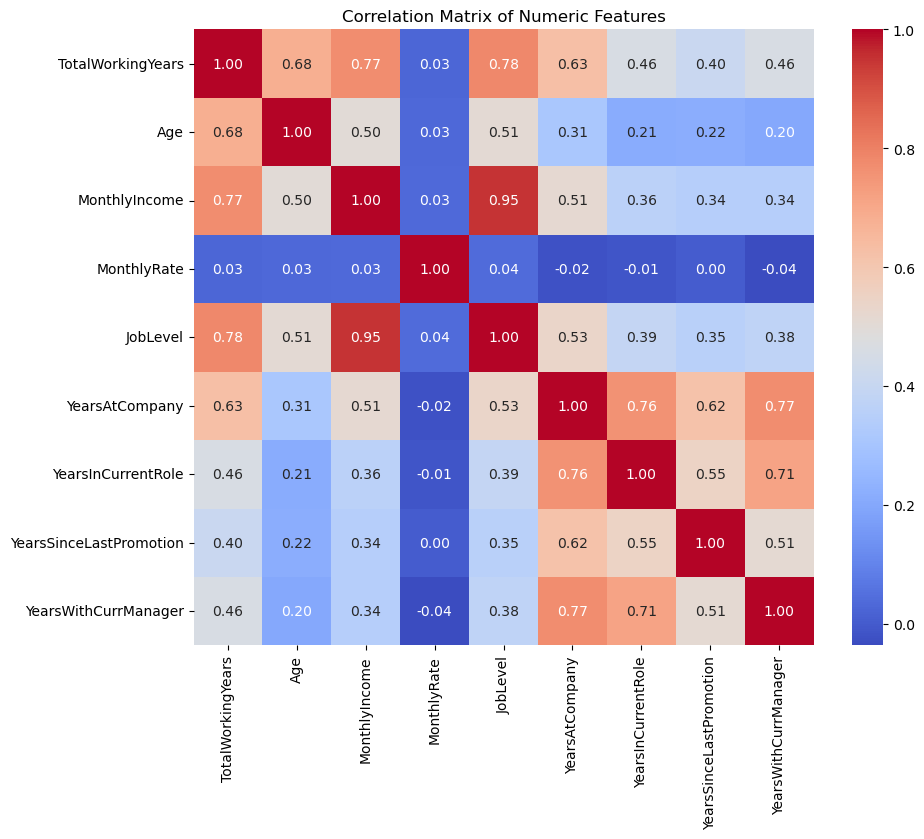

In [10]:
pl.show_correlation_heatmap(df[['TotalWorkingYears', 'Age', 'MonthlyIncome', 'MonthlyRate', 'JobLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])

Looking at the correlation heatmap, we've deducted that a linear regression on monthly income as our dependant variable. Since job level is a categorical variable, we only see a relevant correlation with total working years, making that our independant variable.

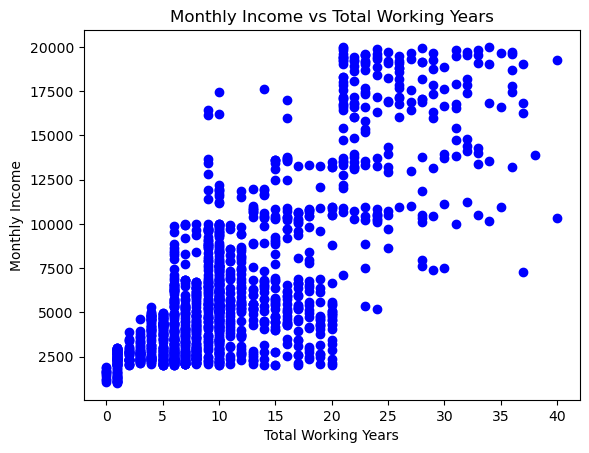

In [11]:
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs Total Working Years')
plt.scatter(df['TotalWorkingYears'], df['MonthlyIncome'], color='blue')
plt.show()

## Linear Regression

In [12]:
# Independent variable
X = df[['TotalWorkingYears', 'JobLevel']].values.reshape(-1, 2)
# Dependent variable
y = df['MonthlyIncome'].values.reshape(-1, 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [14]:
myreg = LinearRegression()

In [15]:
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [16]:
a = myreg.coef_
b = myreg.intercept_

In [17]:
y_predicted = myreg.predict(X_test)

In [18]:
mae = sm.mean_absolute_error(y_test, y_predicted)
mse = sm.mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(sm.mean_squared_error(y_test, y_predicted))
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
r2 = sm.r2_score(y_test, y_predicted)
print('Mean Absolute Error ',mae)
print('Mean Squared Error ',mse)
print('Root Mean Squared Error ',rmse)
print('Explained variance score ',eV )
print('R2 score ',r2)



Mean Absolute Error  1169.7069412284786
Mean Squared Error  2308083.80513453
Root Mean Squared Error  1519.2379027441787
Explained variance score  0.9
R2 score  0.8943930154684404


In [19]:
import ShowLinearRegression as slr

In [20]:
# default test_size is 0.2 and the test_shape is 42 as default
slr.show_model(df, ['JobLevel', 'TotalWorkingYears'], ['MonthlyIncome'], test_size=0.25)

Mean Absolute Error  1146.9181927059494
Mean Squared Error  2213148.6972123818
Root Mean Squared Error  1487.6655192657997
Explained variance score  0.9
R2 score  0.8986707106732997


([array([3842.18467989,   40.32268115])],
 array([-1861.83426456]),
 1146.9181927059494,
 2213148.6972123818,
 np.float64(1487.6655192657997),
 0.9,
 0.8986707106732997,
 LinearRegression())

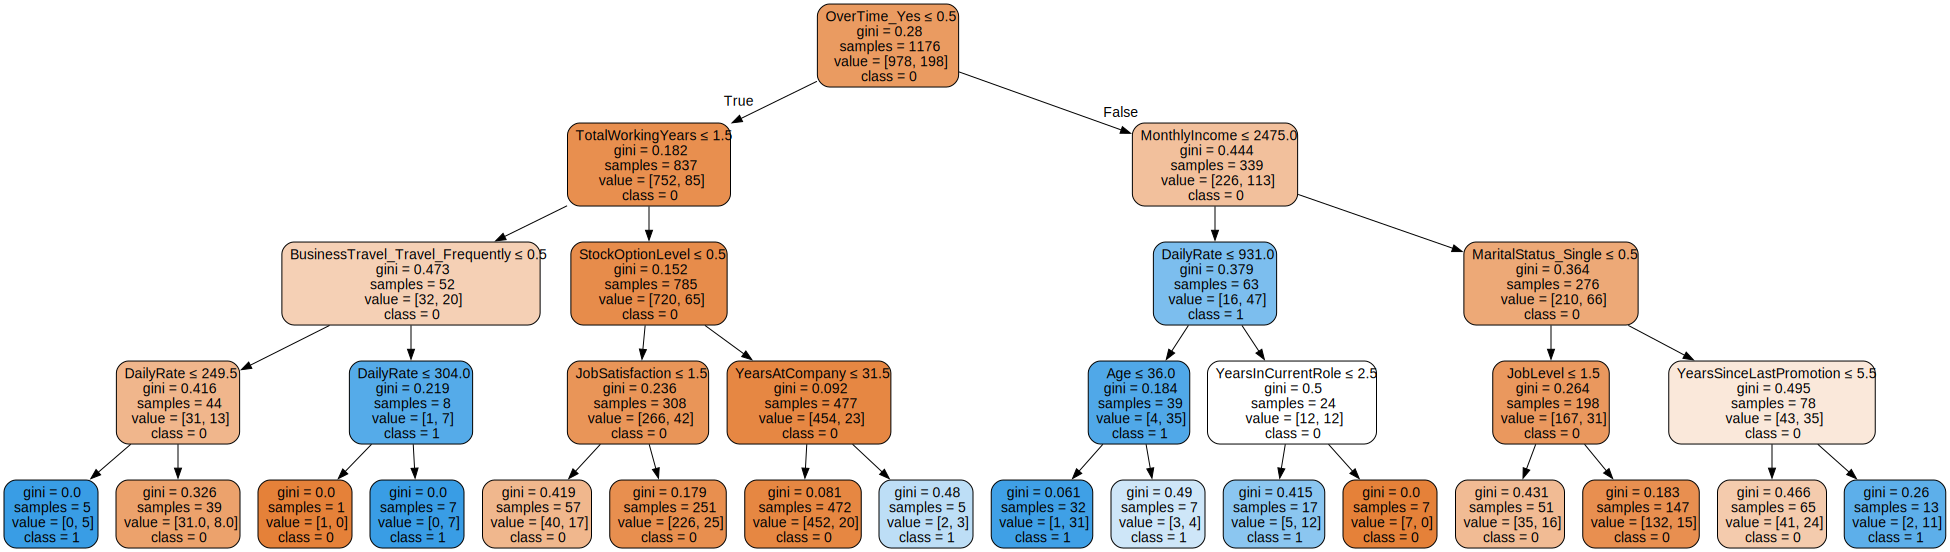

Accuracy: 0.8537414965986394
Confusion Matrix:
 [[249   6]
 [ 37   2]]


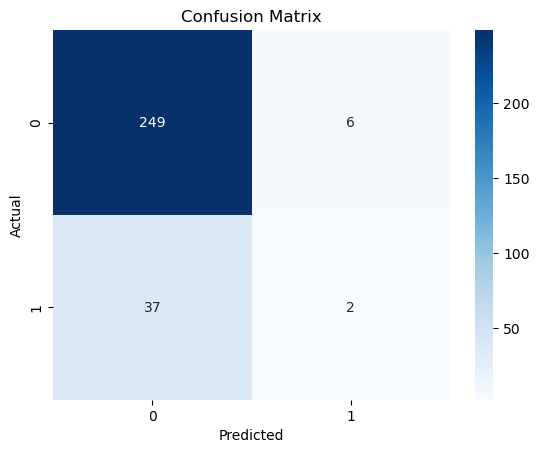

(DecisionTreeClassifier(max_depth=4, random_state=42),
 0.8537414965986394,
 array([[249,   6],
        [ 37,   2]]))

In [21]:
import ShowClassification as sc

# Load the dataset
df_classification = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Handle missing values
df_classification = df_classification.dropna()

# Encode the target variable
df_classification['Attrition'] = df_classification['Attrition'].map({'Yes': 1, 'No': 0})

# Call the function
sc.show_decision_tree(df_classification, 'Attrition', max_depth=4)